In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from utils.dataloader import Dataloader

dataloader = Dataloader(data_dir="data/")

data = dataloader.load_all()
comprehensive_data = data["comprehensive_data"]
covid19_testing_record = data["covid19_testing_record"]
covid19_variants_found = data["covid19_variants_found"]
vaccinations_by_country = data["vaccinations_by_country"]
vaccination_by_manufacturer = data["vaccination_by_manufacturer"]

# Vacciation Manufacturer Distribution

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\150032742.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(all_manufacturers, rotation=90)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\150032742.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(all_manufacturers, rotation=90)


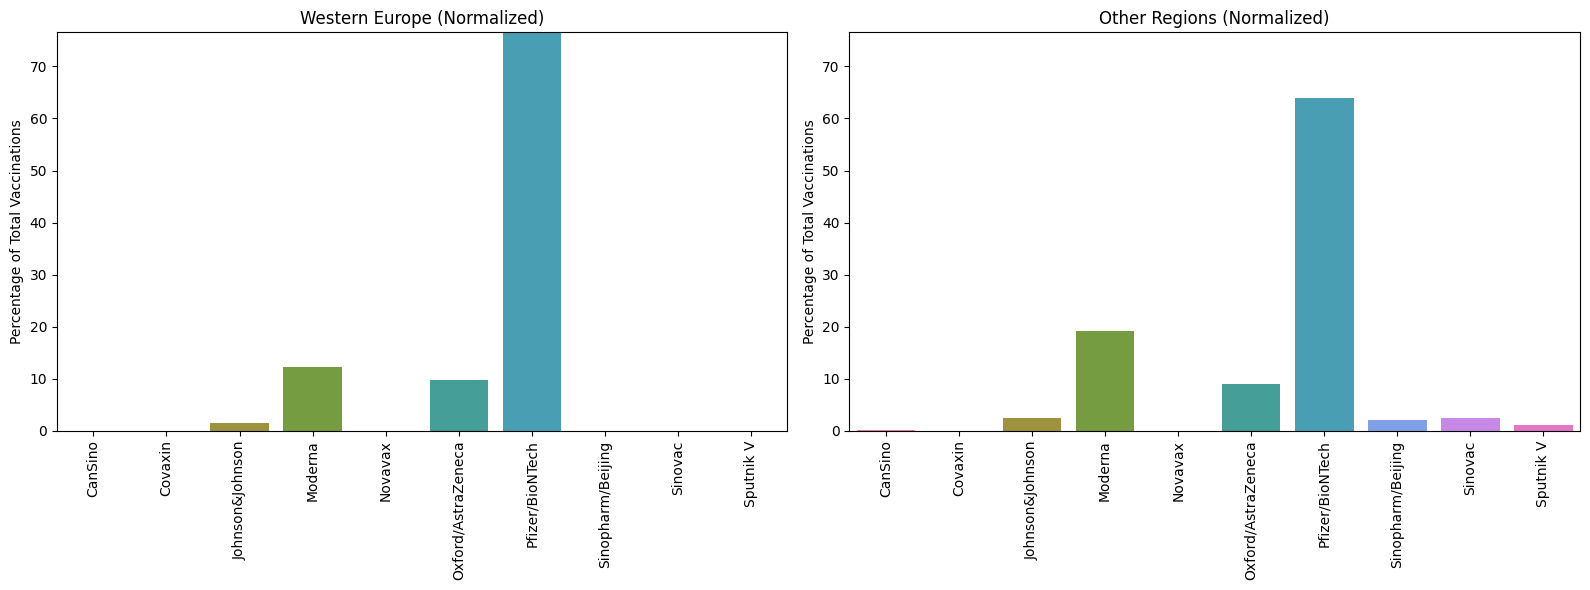

In [3]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / western_data.sum()) * 100
other_data = (other_data / other_data.sum()) * 100
all_data = (all_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)
all_data = all_data.reindex(all_manufacturers, fill_value=0)

# Define a consistent color palette for manufacturers
color_palette = sns.color_palette("husl", n_colors=len(all_manufacturers))
manufacturer_colors = dict(zip(all_manufacturers, color_palette))

# Create three subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Get the max y value for consistent y-axis scale
max_y = max(western_data.max(), other_data.max(), all_data.max())

# Plot for Western Europe
sns.barplot(x=all_manufacturers, y=western_data.values, ax=ax1,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax1.set_title('Western Europe (Normalized)')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Percentage of Total Vaccinations')
ax1.set_ylim(0, max_y)
ax1.set_xticklabels(all_manufacturers, rotation=90)

# Plot for Other Regions
sns.barplot(x=all_manufacturers, y=other_data.values, ax=ax2,
            hue=all_manufacturers, legend=False,
            palette=[manufacturer_colors[m] for m in all_manufacturers])
ax2.set_title('Other Regions (Normalized)')
ax2.tick_params(axis='x', rotation=90)
ax2.set_ylabel('Percentage of Total Vaccinations')
ax2.set_ylim(0, max_y)
ax2.set_xticklabels(all_manufacturers, rotation=90)

# # Plot for All Regions
# sns.barplot(x=all_manufacturers, y=all_data.values, ax=ax3,
#             hue=all_manufacturers, legend=False,
#             palette=[manufacturer_colors[m] for m in all_manufacturers])
# ax3.set_title('All Regions (Normalized)')
# ax3.tick_params(axis='x', rotation=90)
# ax3.set_ylabel('Percentage of Total Vaccinations')
# ax3.set_ylim(0, max_y)
# ax3.set_xticklabels(all_manufacturers, rotation=90)

plt.tight_layout()
plt.show()

<Figure size 1600x900 with 0 Axes>

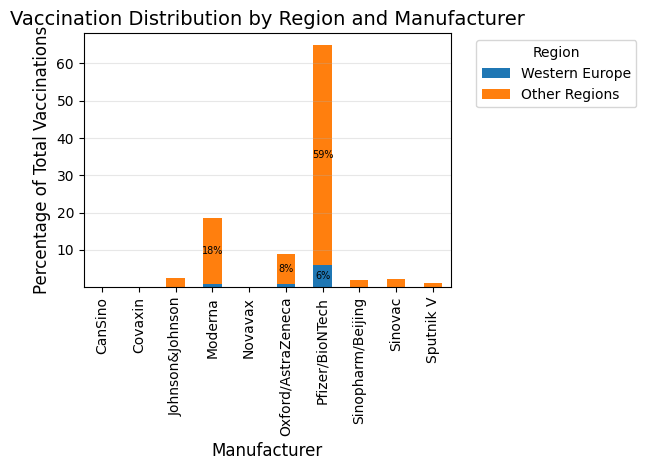

In [4]:
# Calculate total vaccinations for each region
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

other_data = vaccination_by_manufacturer[~vaccination_by_manufacturer['is_western_europe']].groupby(
    'manufacturer')['total_vaccinations'].sum()

all_data = vaccination_by_manufacturer.groupby(
    'manufacturer')['total_vaccinations'].sum()

# Get all unique manufacturers
all_manufacturers = all_data.index.tolist()

# Normalize data by converting to percentages
western_data = (western_data / all_data.sum()) * 100
other_data = (other_data / all_data.sum()) * 100

# Fill missing values with 0 for consistent x-axis
western_data = western_data.reindex(all_manufacturers, fill_value=0)
other_data = other_data.reindex(all_manufacturers, fill_value=0)

# Create a DataFrame for easier plotting
plot_data = pd.DataFrame({
    'Western Europe': western_data,
    'Other Regions': other_data
})

# Create a single figure
plt.figure(figsize=(16, 9))

# Create stacked bar plot
ax = plot_data.plot(kind='bar', stacked=True)

# Customize the plot
plt.title('Vaccination Distribution by Region and Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for c in ax.containers:
    # Add labels only for values >= 5%
    labels = [f'{v:.0f}%' if v >= 5 else '' for v in [rect.get_height()
                                                      for rect in c]]
    ax.bar_label(c, labels=labels, label_type='center',
                 fontsize=7, color='black')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

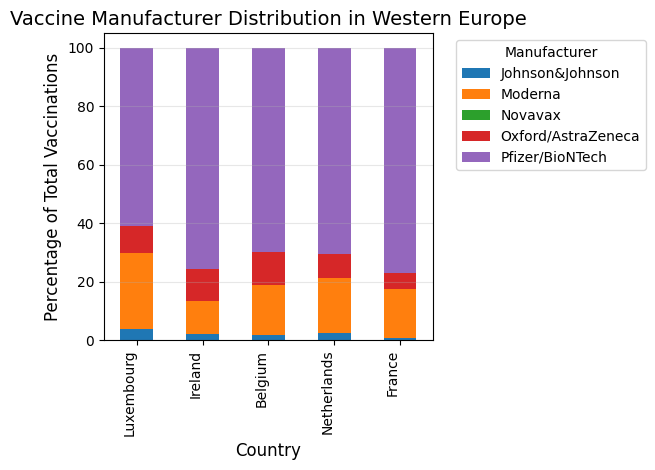

In [5]:
# Get Western European countries and their vaccine distributions
western_data = vaccination_by_manufacturer[vaccination_by_manufacturer['is_western_europe']]

# Get the latest data for each country-manufacturer combination
latest_data = western_data.sort_values(
    'date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

# Calculate percentage of vaccinations by manufacturer for each country
total_by_country = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(lambda x: (
    x['total_vaccinations'] / total_by_country[x['country']]) * 100, axis=1)

# Create a pivot table for easier plotting
pivot_data = latest_data.pivot(
    index='country', columns='manufacturer', values='percentage').fillna(0)

# Sort countries by total vaccinations
country_order = latest_data.groupby(
    'country')['total_vaccinations'].sum().sort_values(ascending=True).index

# Plot the distribution
plt.figure(figsize=(15, 10))
pivot_data.reindex(country_order).plot(kind='bar', stacked=True)

plt.title('Vaccine Manufacturer Distribution in Western Europe', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90, ha='right')

# Add grid lines for better readability
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

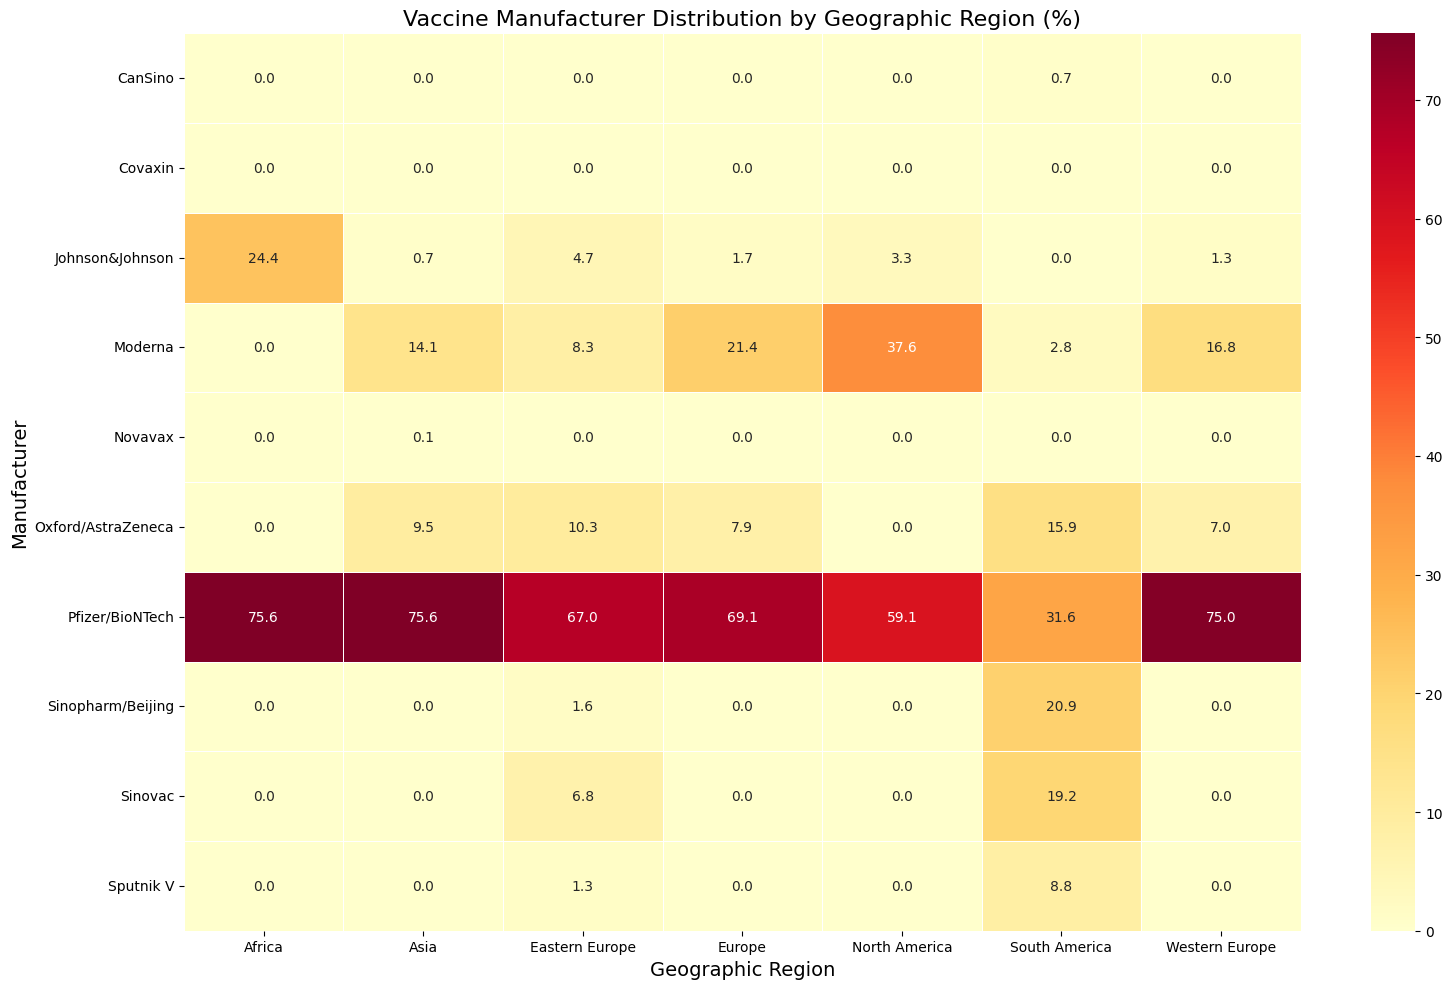

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\700439840.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\700439840.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\700439840.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\700439840.py:127: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\700439840.py:127: UserWarning: set_ticklabels() sh

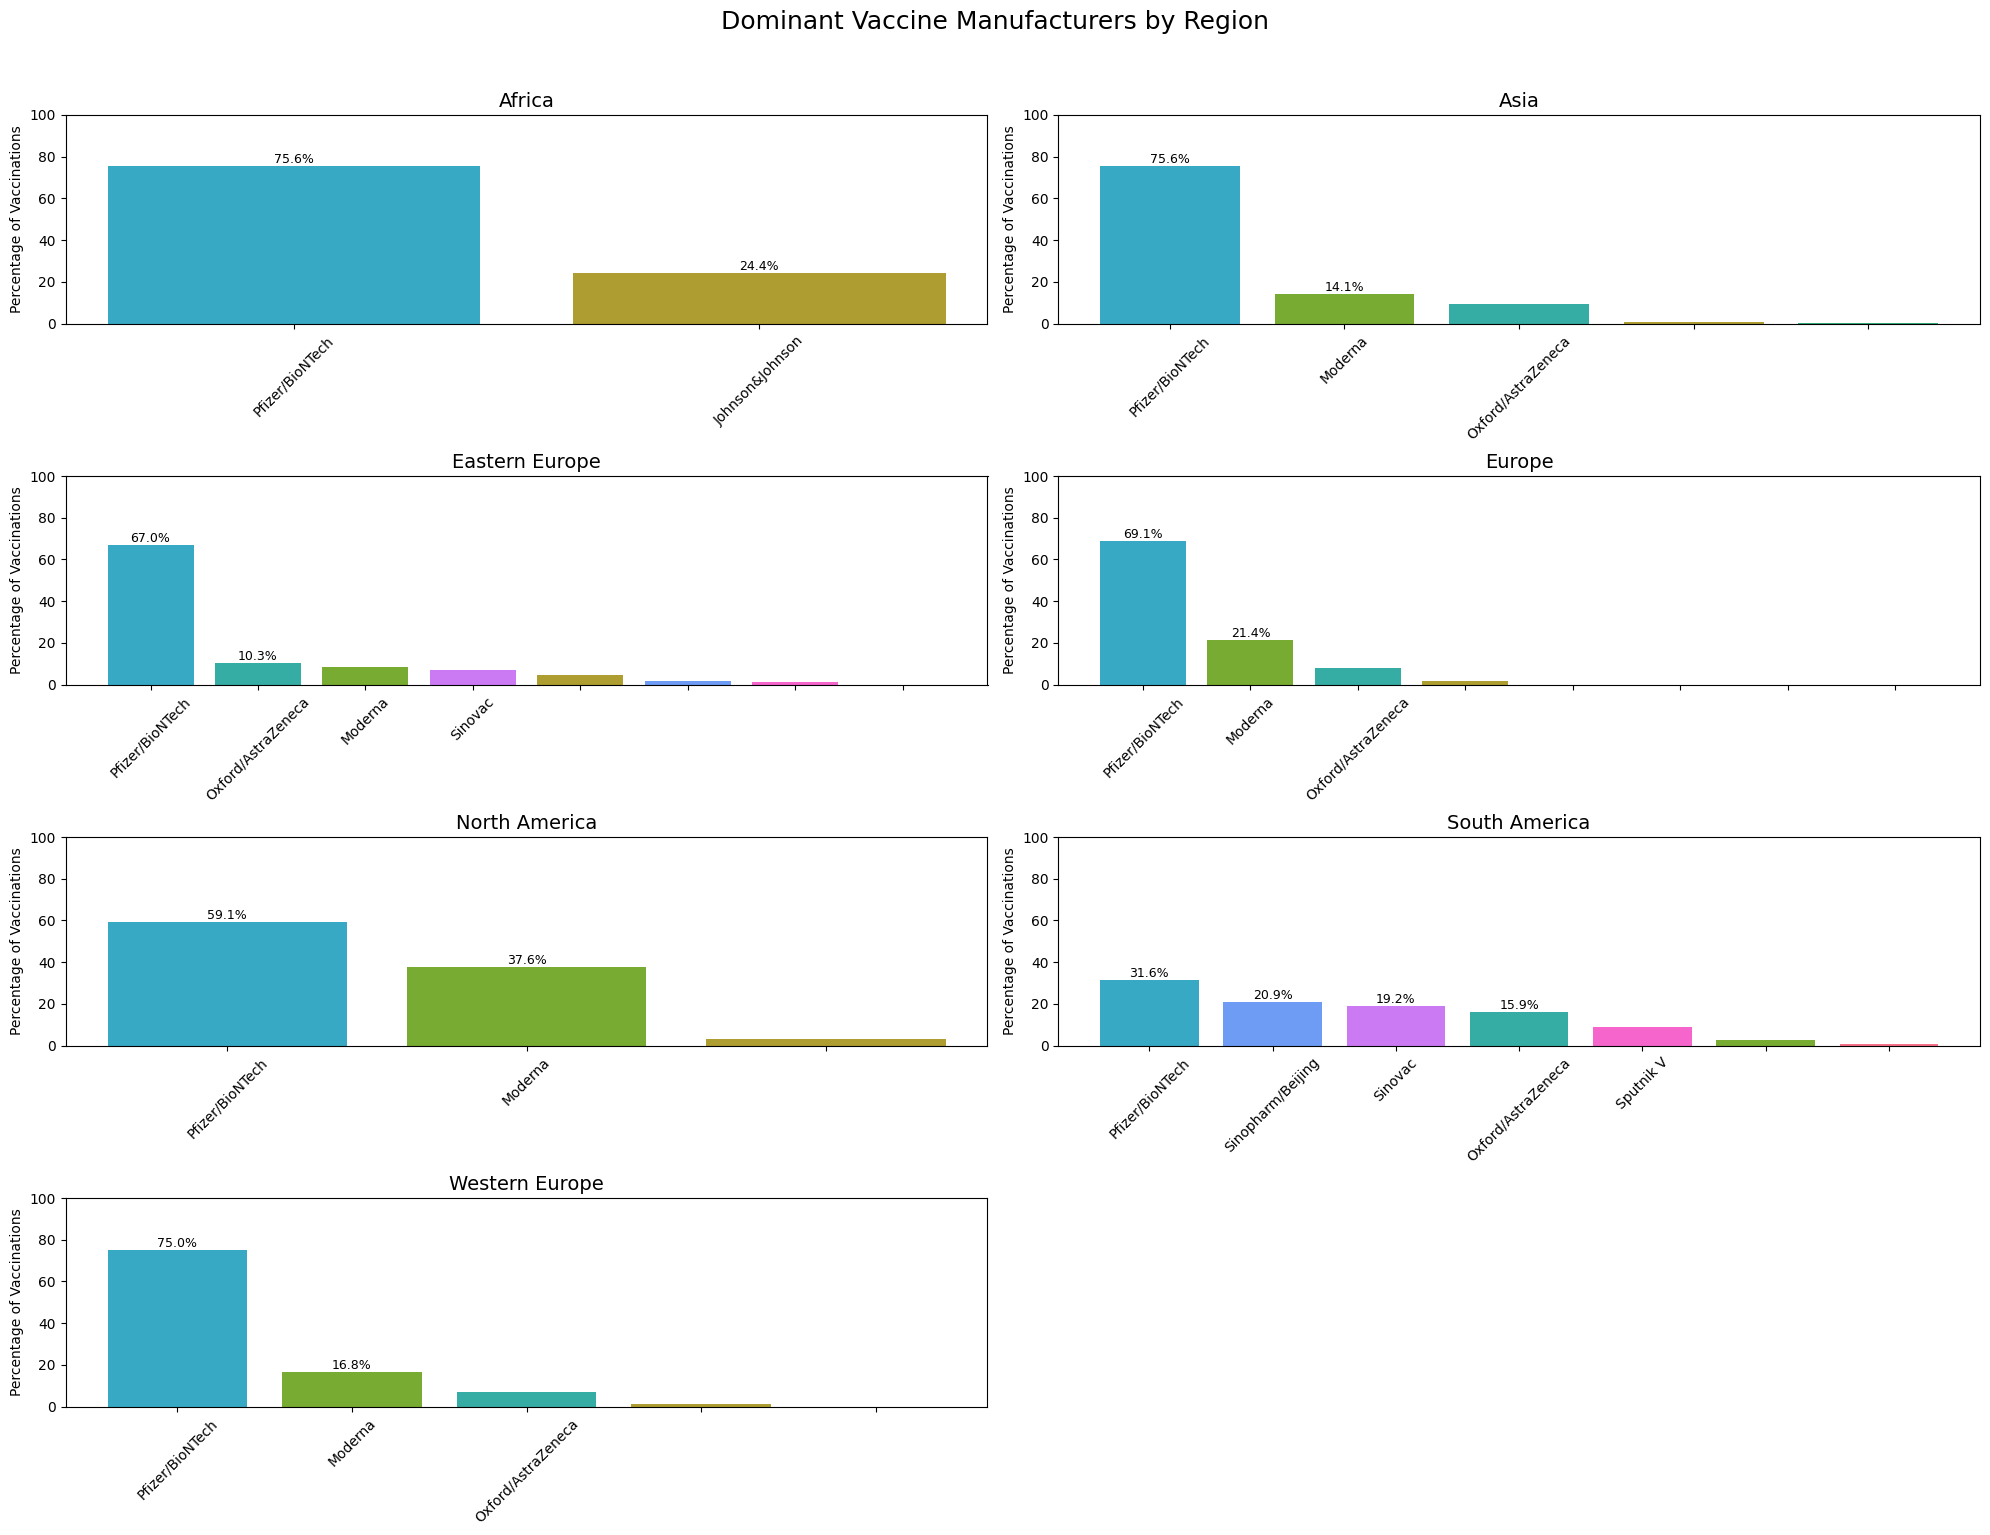

In [6]:
# Analyze geographic patterns in vaccine distribution

# Group countries into continental regions (simplified approach)
region_mapping = {
    # These are arbitrary mappings based on common country groupings
    # Western Europe
    'Belgium': 'Western Europe', 'France': 'Western Europe', 'Ireland': 'Western Europe',
    'Luxembourg': 'Western Europe', 'Monaco': 'Western Europe', 'Netherlands': 'Western Europe',
    'United Kingdom': 'Western Europe',

    # Rest of Europe
    'Austria': 'Europe', 'Denmark': 'Europe', 'Finland': 'Europe',
    'Germany': 'Europe', 'Greece': 'Europe', 'Iceland': 'Europe',
    'Italy': 'Europe', 'Norway': 'Europe', 'Portugal': 'Europe', 
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',

    # North America
    'Canada': 'North America', 'Costa Rica': 'North America', 'Mexico': 'North America',
    'Panama': 'North America', 'United States': 'North America',

    # South America
    'Argentina': 'South America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Chile': 'South America', 'Colombia': 'South America', 'Ecuador': 'South America',
    'Paraguay': 'South America', 'Peru': 'South America', 'Uruguay': 'South America',
    'Venezuela': 'South America',

    # Asia
    'China': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Japan': 'Asia',
    'Malaysia': 'Asia', 'Philippines': 'Asia', 'Singapore': 'Asia', 'South Korea': 'Asia',
    'Taiwan': 'Asia', 'Thailand': 'Asia', 'Vietnam': 'Asia',
    'Bangladesh': 'Asia', 'Pakistan': 'Asia', 'Sri Lanka': 'Asia',

    # Middle East
    'Iran': 'Middle East', 'Iraq': 'Middle East', 'Israel': 'Middle East',
    'Saudi Arabia': 'Middle East', 'Turkey': 'Middle East', 'United Arab Emirates': 'Middle East',

    # Africa
    'Algeria': 'Africa', 'Egypt': 'Africa', 'Ethiopia': 'Africa', 'Kenya': 'Africa',
    'Morocco': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Tunisia': 'Africa',

    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',

    # Eastern Europe
    'Bulgaria': 'Eastern Europe', 'Croatia': 'Eastern Europe', 'Czech Republic': 'Eastern Europe',
    'Estonia': 'Eastern Europe', 'Hungary': 'Eastern Europe', 'Latvia': 'Eastern Europe',
    'Lithuania': 'Eastern Europe', 'Poland': 'Eastern Europe', 'Romania': 'Eastern Europe',
    'Russia': 'Eastern Europe', 'Serbia': 'Eastern Europe', 'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe', 'Ukraine': 'Eastern Europe'
}

# Get the latest data for each country and manufacturer
latest_vax_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last().reset_index()

# Add region to vaccination data
latest_vax_data['region'] = latest_vax_data['country'].map(region_mapping)

# Filter out countries that don't have a region assigned
latest_vax_data_with_region = latest_vax_data.dropna(subset=['region'])

# Calculate manufacturer distribution by region
region_distribution = latest_vax_data_with_region.groupby(
    ['region', 'manufacturer'])['total_vaccinations'].sum().reset_index()

# Calculate percentages within each region
region_totals = region_distribution.groupby(
    'region')['total_vaccinations'].sum()
region_distribution['percentage'] = region_distribution.apply(
    lambda x: (x['total_vaccinations'] / region_totals[x['region']]) * 100, axis=1
)

# Create a pivot table for heatmap
region_pivot = region_distribution.pivot(
    index='manufacturer', columns='region', values='percentage').fillna(0)

# Plot heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(region_pivot, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)

plt.title('Vaccine Manufacturer Distribution by Geographic Region (%)', fontsize=16)
plt.xlabel('Geographic Region', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.tight_layout()
plt.show()

# Create a figure with region-specific subplots for top 3 manufacturers
plt.figure(figsize=(20, 15))

# Determine number of regions for subplot layout
regions = region_distribution['region'].unique()
n_regions = len(regions)
ncols = 2  # Can be adjusted based on number of regions
nrows = (n_regions + 1) // ncols

# Create subplots
for i, region in enumerate(regions):
    ax = plt.subplot(nrows, ncols, i + 1)

    # Get data for this region
    region_data = region_distribution[region_distribution['region'] == region]

    # Sort by percentage and get top manufacturers
    region_data = region_data.sort_values('percentage', ascending=False)

    # Create bar chart
    bars = ax.bar(region_data['manufacturer'], region_data['percentage'],
                  color=[manufacturer_colors.get(m, 'gray') for m in region_data['manufacturer']])

    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        if height >= 10:  # Only label bars with significant percentages
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontsize=9)

    # Set titles and labels
    ax.set_title(f'{region}', fontsize=14)
    ax.set_ylabel('Percentage of Vaccinations')
    ax.set_ylim(0, 100)
    ax.tick_params(axis='x', rotation=45)

    # Only show x labels for significant manufacturers
    threshold = 5  # Only show labels for manufacturers with >= 5% share
    labels = [m if p >= threshold else '' for m, p in zip(
        region_data['manufacturer'], region_data['percentage'])]
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.suptitle('Dominant Vaccine Manufacturers by Region', fontsize=18, y=1.02)
plt.subplots_adjust(top=0.95)
plt.show()

# Vaccination Manufacturer Performance

In [7]:
# Get the latest data for each country-manufacturer combination
latest_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_data = latest_data.reset_index()

# Calculate percentage for each manufacturer within each country
country_totals = latest_data.groupby('country')['total_vaccinations'].sum()
latest_data['percentage'] = latest_data.apply(
    lambda x: (x['total_vaccinations'] / country_totals[x['country']]) * 100, axis=1)

# Find dominant manufacturer for each country
dominant_manufacturers = latest_data.loc[latest_data.groupby('country')['percentage'].idxmax()]
dominant_manufacturers = dominant_manufacturers.sort_values('percentage', ascending=False)

# Display results
print("Dominant Manufacturers by Country:")
print("=================================")
for _, row in dominant_manufacturers.iterrows():
    print(f"{row['country']}: {row['manufacturer']} ({row['percentage']:.1f}%)")

Dominant Manufacturers by Country:
Japan: Pfizer/BioNTech (93.8%)
Iceland: Pfizer/BioNTech (92.1%)
Denmark: Pfizer/BioNTech (84.3%)
Czechia: Pfizer/BioNTech (83.5%)
Austria: Pfizer/BioNTech (80.5%)
Finland: Pfizer/BioNTech (79.1%)
Norway: Pfizer/BioNTech (78.5%)
France: Pfizer/BioNTech (77.1%)
Poland: Pfizer/BioNTech (76.8%)
Romania: Pfizer/BioNTech (76.7%)
Slovenia: Pfizer/BioNTech (76.3%)
South Africa: Pfizer/BioNTech (75.6%)
Ireland: Pfizer/BioNTech (75.5%)
Sweden: Pfizer/BioNTech (75.5%)
Croatia: Pfizer/BioNTech (75.4%)
Slovakia: Pfizer/BioNTech (74.5%)
Lithuania: Pfizer/BioNTech (73.9%)
Chile: Sinovac (73.9%)
Germany: Pfizer/BioNTech (73.3%)
Estonia: Pfizer/BioNTech (73.1%)
European Union: Pfizer/BioNTech (71.8%)
Cyprus: Pfizer/BioNTech (71.6%)
Netherlands: Pfizer/BioNTech (70.5%)
Belgium: Pfizer/BioNTech (69.8%)
Portugal: Pfizer/BioNTech (68.3%)
Liechtenstein: Moderna (67.0%)
Bulgaria: Pfizer/BioNTech (65.8%)
Italy: Pfizer/BioNTech (65.2%)
Spain: Pfizer/BioNTech (64.8%)
Switzerla

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\4192741489.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dominant_manufacturers, x='manufacturer', y='percentage',


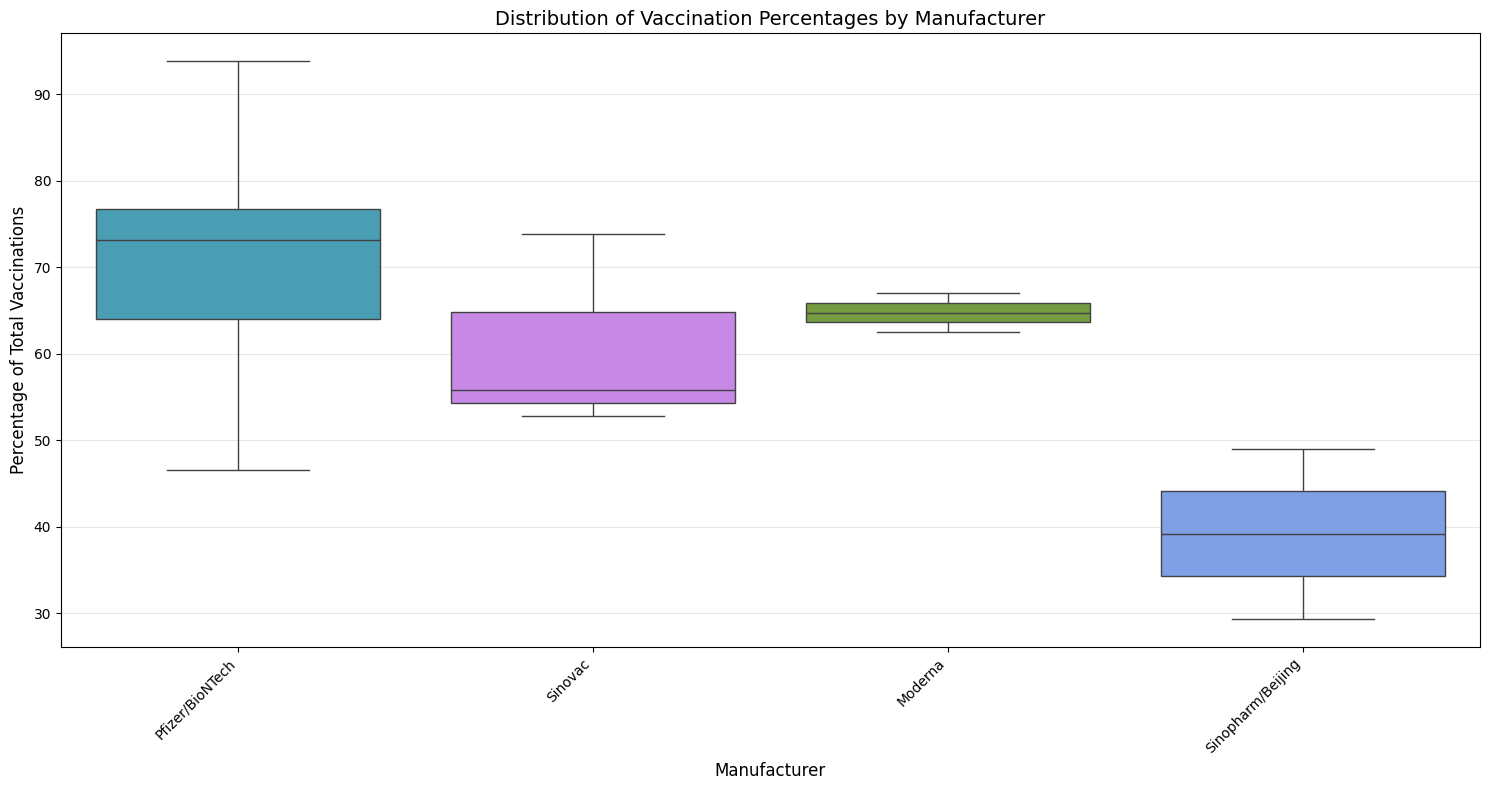

In [8]:
# Create a block plot
plt.figure(figsize=(15, 8))

# Create box plot
sns.boxplot(data=dominant_manufacturers, x='manufacturer', y='percentage',
            palette=manufacturer_colors)

# Customize the plot
plt.title('Distribution of Vaccination Percentages by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Percentage of Total Vaccinations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add median values as text
# medians = latest_data.groupby('manufacturer')['percentage'].median()
# for i, median in enumerate(medians):
#     plt.text(i, median, f'{median:.1f}%', 
#              horizontalalignment='center', 
#              verticalalignment='bottom',
#              fontsize=8)

plt.tight_layout()
plt.show()

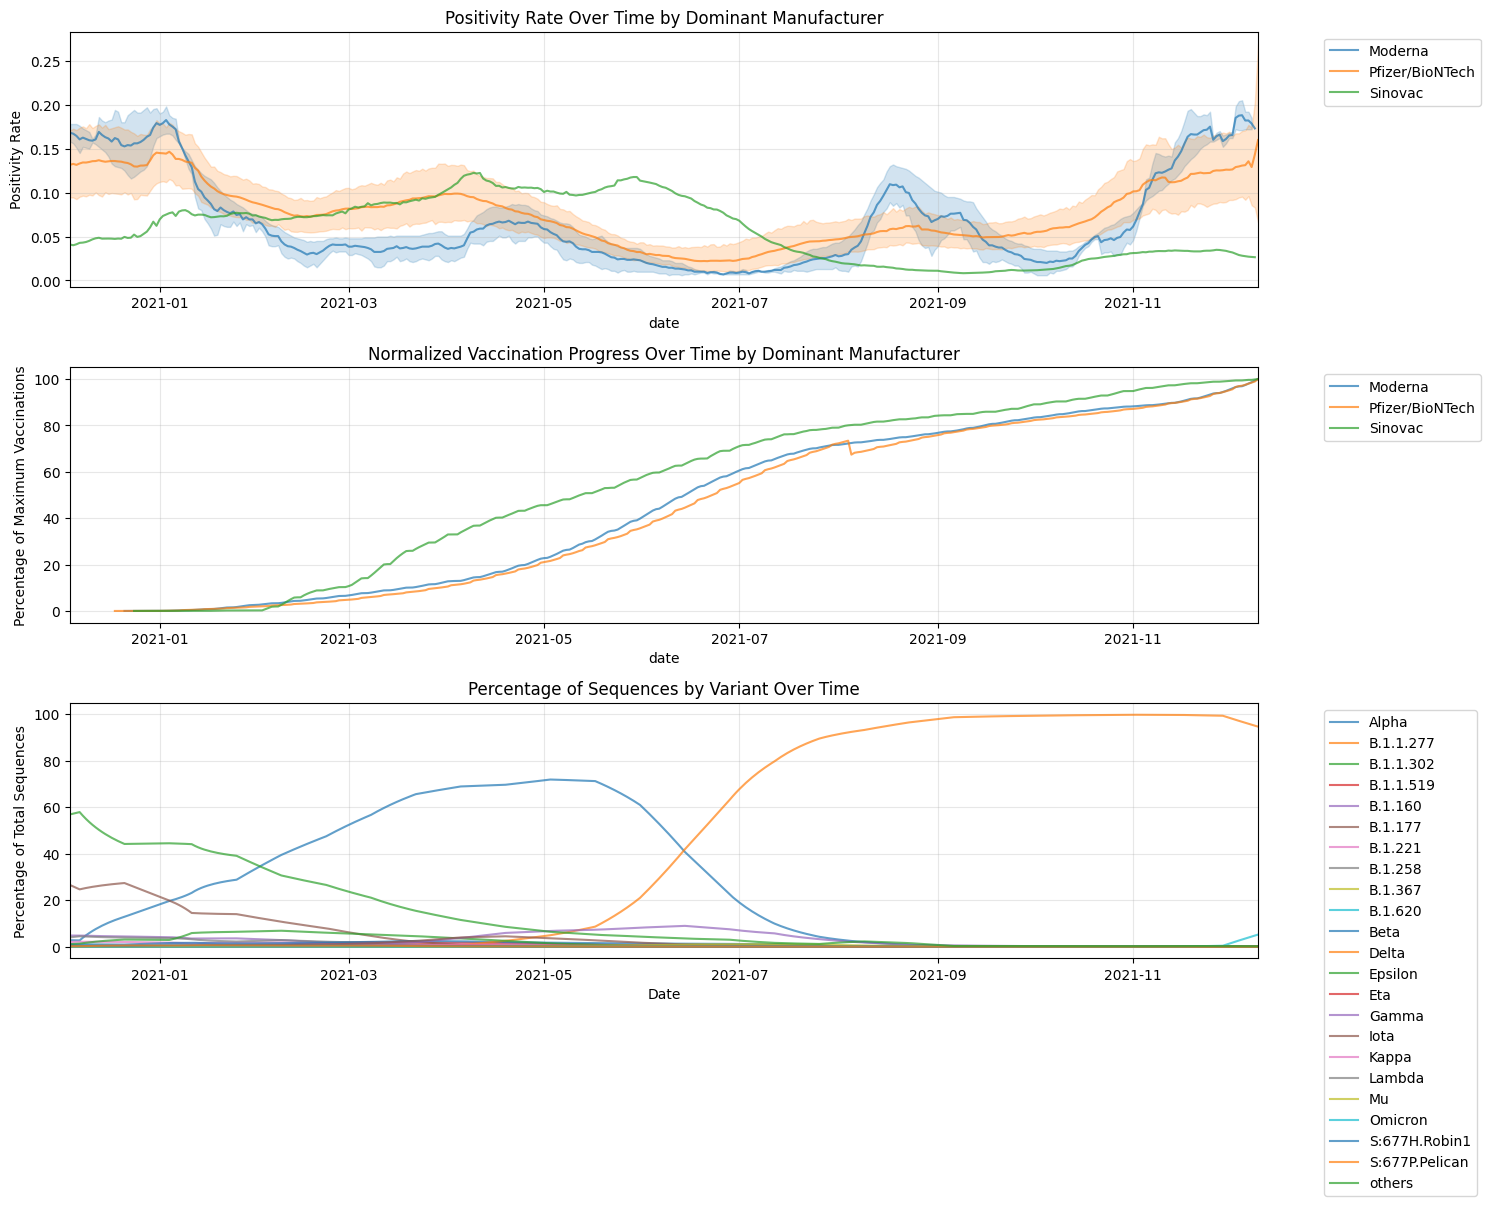

In [9]:
# Get the dominant manufacturer for each country
# Filter for countries where dominant manufacturer has >= 60% share
countries_by_manufacturer = dominant_manufacturers[dominant_manufacturers['percentage'] >= 60].set_index('country')['manufacturer']

all_manufacturers = all_data.index.tolist()

# Merge testing data with manufacturer info
merged_data = covid19_testing_record.merge(
    countries_by_manufacturer.to_frame('dominant_manufacturer'),
    left_on='country',
    right_index=True,
    how='inner'
)

# Define common date range
min_date = max(
    merged_data['date'].min(),
    vaccination_by_manufacturer['date'].min(),
    covid19_variants_found['date'].min()
)
max_date = min(
    merged_data['date'].max(),
    vaccination_by_manufacturer['date'].max(),
    covid19_variants_found['date'].max()
)

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# Plot positivity rate
for manufacturer in all_manufacturers:
    countries = countries_by_manufacturer[countries_by_manufacturer == manufacturer].index
    data = merged_data[merged_data['country'].isin(countries)]
    data = data[(data['date'] >= min_date) & (data['date'] <= max_date)]
    
    if len(data) > 0:
        sns.lineplot(data=data, x='date', y='positive_rate',
                    label=manufacturer, ax=ax1, alpha=0.7)

ax1.set_title('Positivity Rate Over Time by Dominant Manufacturer')
ax1.set_ylabel('Positivity Rate')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(min_date, max_date)

# Plot vaccination numbers over time
for manufacturer in all_manufacturers:
    countries = countries_by_manufacturer[countries_by_manufacturer == manufacturer].index
    data = vaccination_by_manufacturer[vaccination_by_manufacturer['country'].isin(countries)]
    data = data[(data['date'] >= min_date) & (data['date'] <= max_date)]
    
    if len(data) > 0:
        # Group by date and sum vaccinations, then normalize
        vax_data = data.groupby('date')['total_vaccinations'].sum().reset_index()
        # Normalize by dividing by the maximum value
        vax_data['total_vaccinations'] = vax_data['total_vaccinations'] / vax_data['total_vaccinations'].max() * 100
        sns.lineplot(data=vax_data, x='date', y='total_vaccinations',
                    label=manufacturer, ax=ax2, alpha=0.7)

ax2.set_title('Normalized Vaccination Progress Over Time by Dominant Manufacturer')
ax2.set_ylabel('Percentage of Maximum Vaccinations')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(min_date, max_date)

# Plot variants over time
variants_data = covid19_variants_found[(covid19_variants_found['date'] >= min_date) & 
                                     (covid19_variants_found['date'] <= max_date)]
for variant in variants_data['variant'].unique():
    if variant == 'non_who':
        continue
    variant_data = variants_data[variants_data['variant'] == variant]
    if variant_data['number_of_sequences'].sum() == 0:
        continue
    # Calculate percentage of sequences for each date
    variant_data = variant_data.groupby('date').agg({
        'number_of_sequences': 'sum',
        'total_sequences': 'sum'
    })
    variant_data['percentage'] = (variant_data['number_of_sequences'] / variant_data['total_sequences']) * 100
    
    ax3.plot(variant_data.index, variant_data['percentage'], label=variant, alpha=0.7)

ax3.set_title('Percentage of Sequences by Variant Over Time')
ax3.set_xlabel('Date')
ax3.set_ylabel('Percentage of Total Sequences')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.set_xlim(min_date, max_date)

plt.tight_layout()
plt.show()

## Manufacturer Performance Formula

from modified VEI formula above, we modify the formula to include manufacturer performance. The formula is as follows:

$$
\text{Manufacturer VEI} = \frac{{\sum}_{i=1}^{n} \text{Manufacturer Total Vaccinations}_i \times \text{Country VEI}}{{\sum}_{i=1}^{n} \text{Country Total Vaccinations}_i}
$$

Where:
- $\text{Manufacturer VEI}$ is the Manufacturer Vaccine Effectiveness Index
- $\text{Manufacturer Total Vaccinations}_i$ is the total vaccinations administered by manufacturer $i$
- $\text{Country VEI}$ is the Vaccine Effectiveness Index for the country
- $\text{Country Total Vaccinations}_i$ is the total vaccinations administered in the country

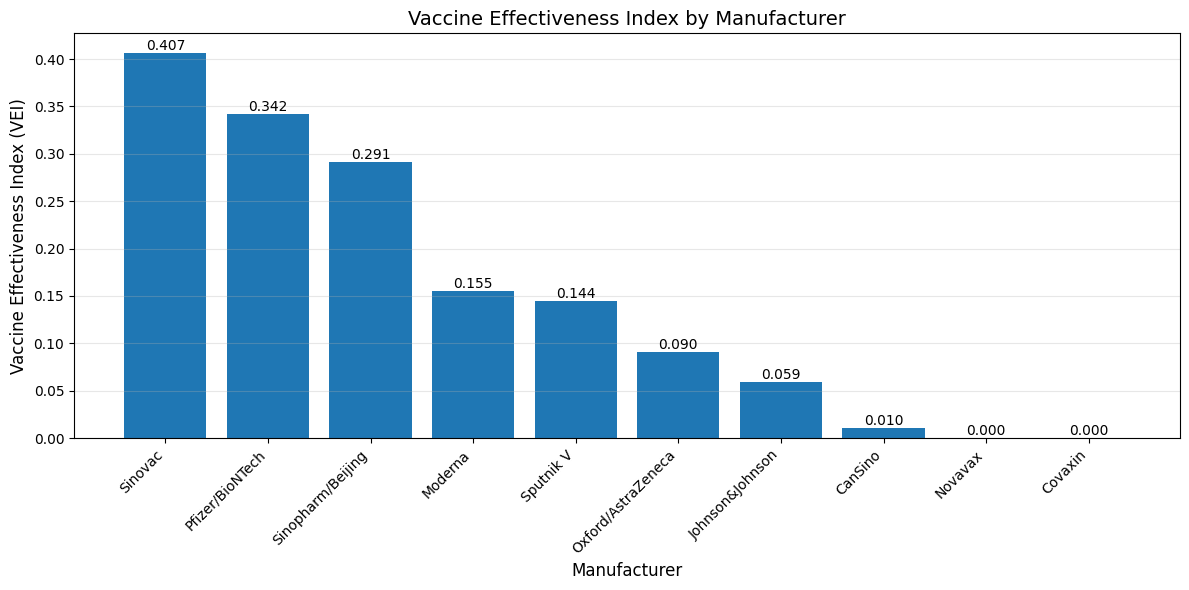

In [10]:
# Get the latest vaccination data for each country
latest_vax_data = vaccination_by_manufacturer.sort_values('date').groupby(['country', 'manufacturer']).last()
latest_vax_data = latest_vax_data.reset_index()

# Calculate vaccination percentage for each country
country_totals = latest_vax_data.groupby('country')['total_vaccinations'].sum()
latest_vax_data['vax_percentage'] = latest_vax_data.apply(
    lambda x: (x['total_vaccinations'] / country_totals[x['country']]) * 100, axis=1)

# Get the latest testing data for each country
latest_testing_data = covid19_testing_record.sort_values('date').groupby('country').last()
latest_testing_data = latest_testing_data.reset_index()

# Get population data for each country
# Using vaccinations_by_country to estimate population as per formula provided
population_data = vaccinations_by_country.sort_values('date').groupby('country').last()
population_data['estimated_population'] = population_data.apply(
    lambda x: x['people_vaccinated'] / (x['people_vaccinated_per_hundred'] / 100) if x['people_vaccinated_per_hundred'] > 0 else None, 
    axis=1)

# Get the latest case data for each country
latest_case_data = comprehensive_data.copy()
latest_case_data = latest_case_data

# Merge vaccination, testing, case, and population data
merged_data = latest_vax_data.merge(
    latest_testing_data[['country', 'positive_rate']], 
    on='country', 
    how='inner'
).merge(
    population_data[['estimated_population']], 
    left_on='country',
    right_index=True,
    how='inner'
).merge(
    latest_case_data[['country', 'confirmed_cases']],
    on='country',
    how='inner'
)

# Calculate infection rate for each country
merged_data['infection_rate'] = merged_data['confirmed_cases'] / \
    merged_data['estimated_population'] * 100

# Get maximum infection rate to normalize
max_infection_rate = merged_data['infection_rate'].max()

# Calculate VEI using the new formula
# VEI = (1 - infection_rate/max(infection_rate)) × (vaccination_rate/100)
merged_data['vei'] = (1 - merged_data['infection_rate']/max_infection_rate) * (merged_data['vax_percentage']/100)

# Group by manufacturer and calculate weighted average VEI
manufacturer_vei = merged_data.groupby('manufacturer').agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).sort_values('vei', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(manufacturer_vei.index, manufacturer_vei['vei'])

# Customize the plot
plt.title('Vaccine Effectiveness Index by Manufacturer', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Specific context of prevntive and non-preventive vaccine

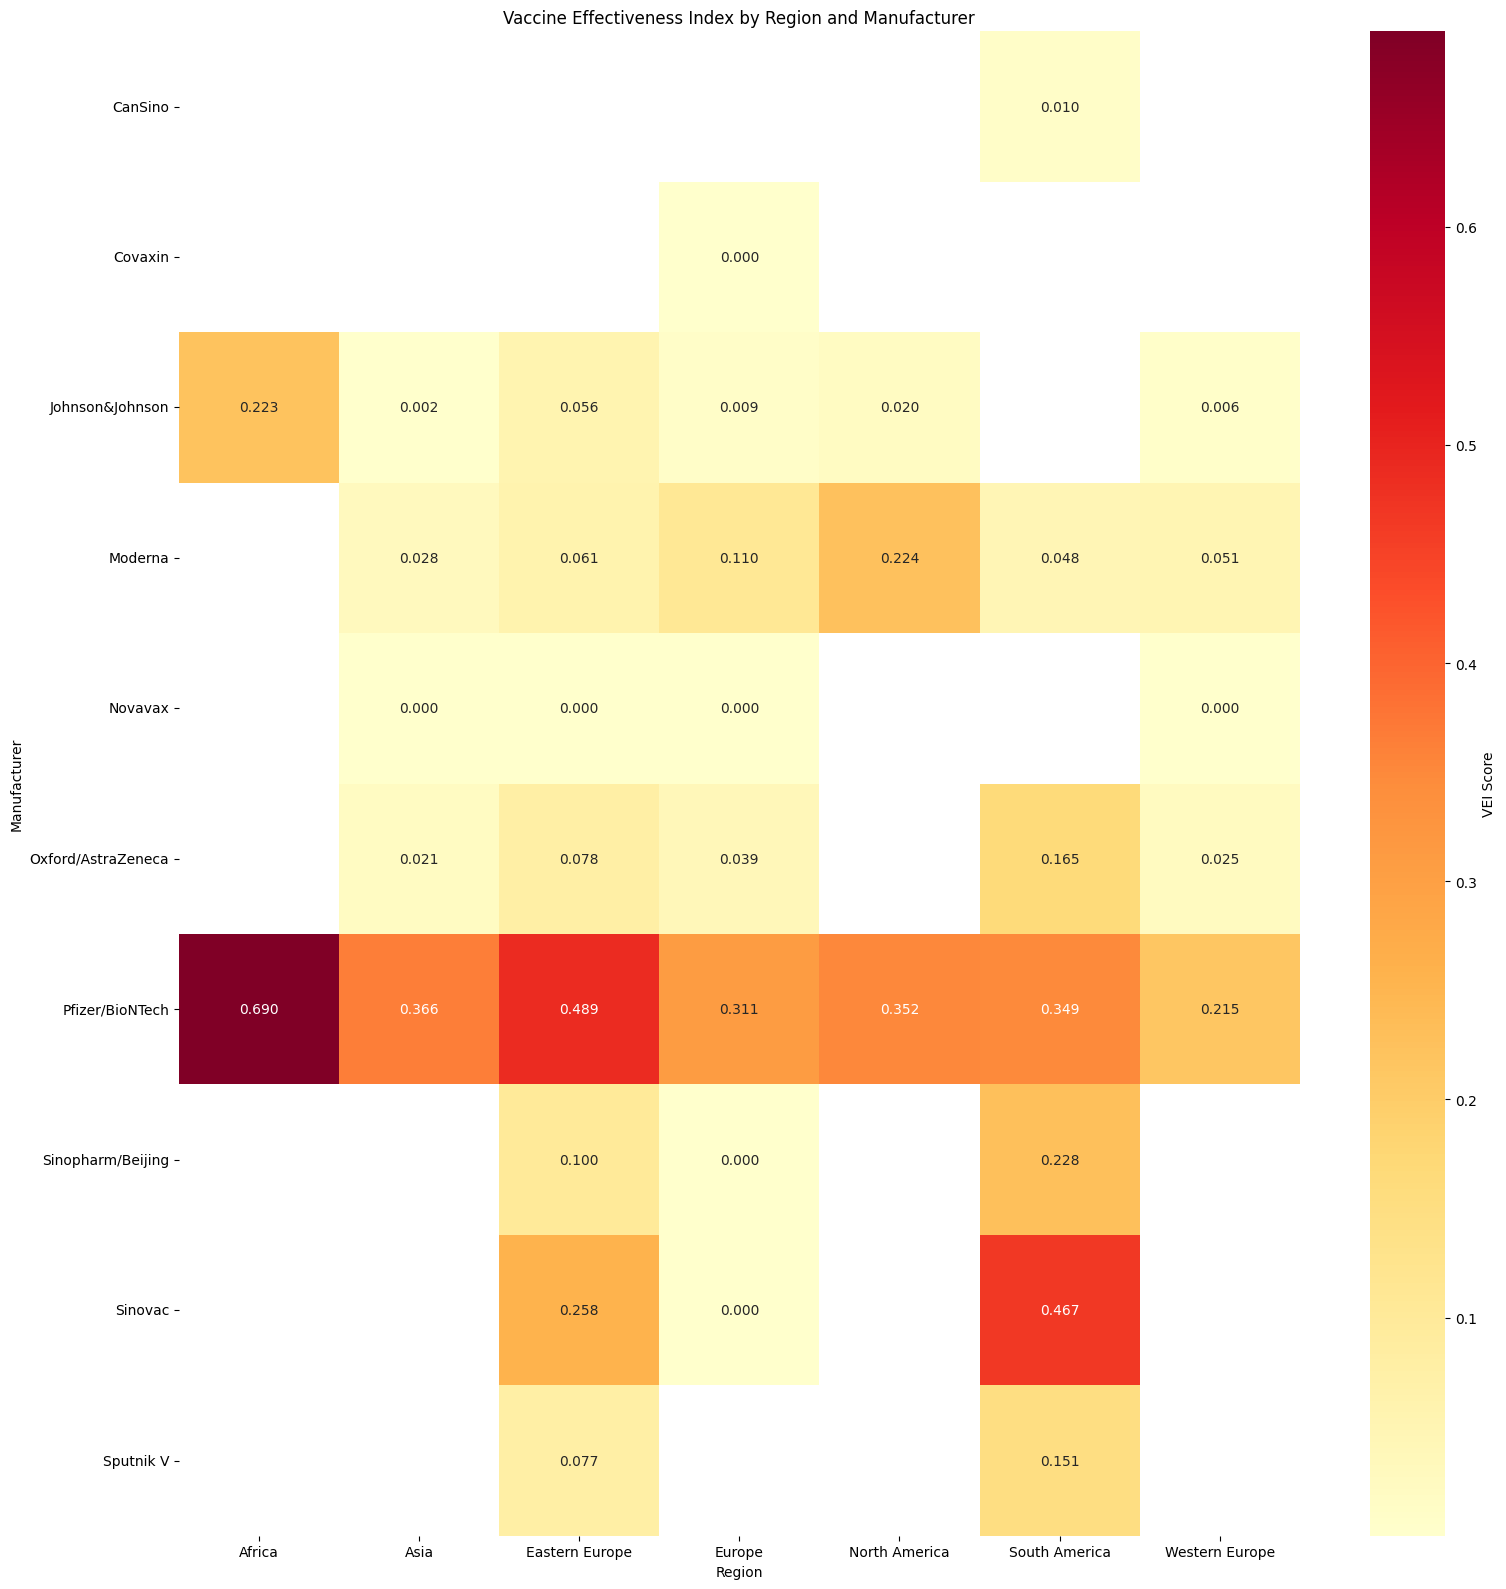

In [18]:
# Prepare data by grouping by region and manufacturer
# Add region to merged data using region_mapping
merged_data['region'] = merged_data['country'].map(region_mapping)

# Group by region and manufacturer and calculate weighted VEI
region_vei = merged_data.groupby(['region', 'manufacturer']).agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).reset_index()

# Create a pivot table for heatmap visualization
vei_pivot = region_vei.pivot(
    index='manufacturer', columns='region', values='vei')

# Create figure with two subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 16))

# Plot heatmap
sns.heatmap(vei_pivot,
            annot=True,
            fmt='.3f',
            cmap='YlOrRd',
            ax=ax1,
            cbar_kws={'label': 'VEI Score'})
ax1.set_title('Vaccine Effectiveness Index by Region and Manufacturer')
ax1.set_xlabel('Region')
ax1.set_ylabel('Manufacturer')

# # Plot bar chart of global VEI scores
# global_vei = merged_data.groupby('manufacturer').apply(
#     lambda x: np.average(x['vei'], weights=x['total_vaccinations'])
# ).sort_values(ascending=True)

# colors = [manufacturer_colors.get(m, 'gray') for m in global_vei.index]
# bars = ax2.barh(global_vei.index, global_vei.values, color=colors)
# ax2.set_title('Global Vaccine Effectiveness Index Ranking')
# ax2.set_xlabel('VEI Score')

# # Add value labels on bars
# for bar in bars:
#     width = bar.get_width()
#     ax2.text(width, bar.get_y() + bar.get_height()/2,
#              f'{width:.3f}',
#              ha='left', va='center',
#              fontsize=10,
#              bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

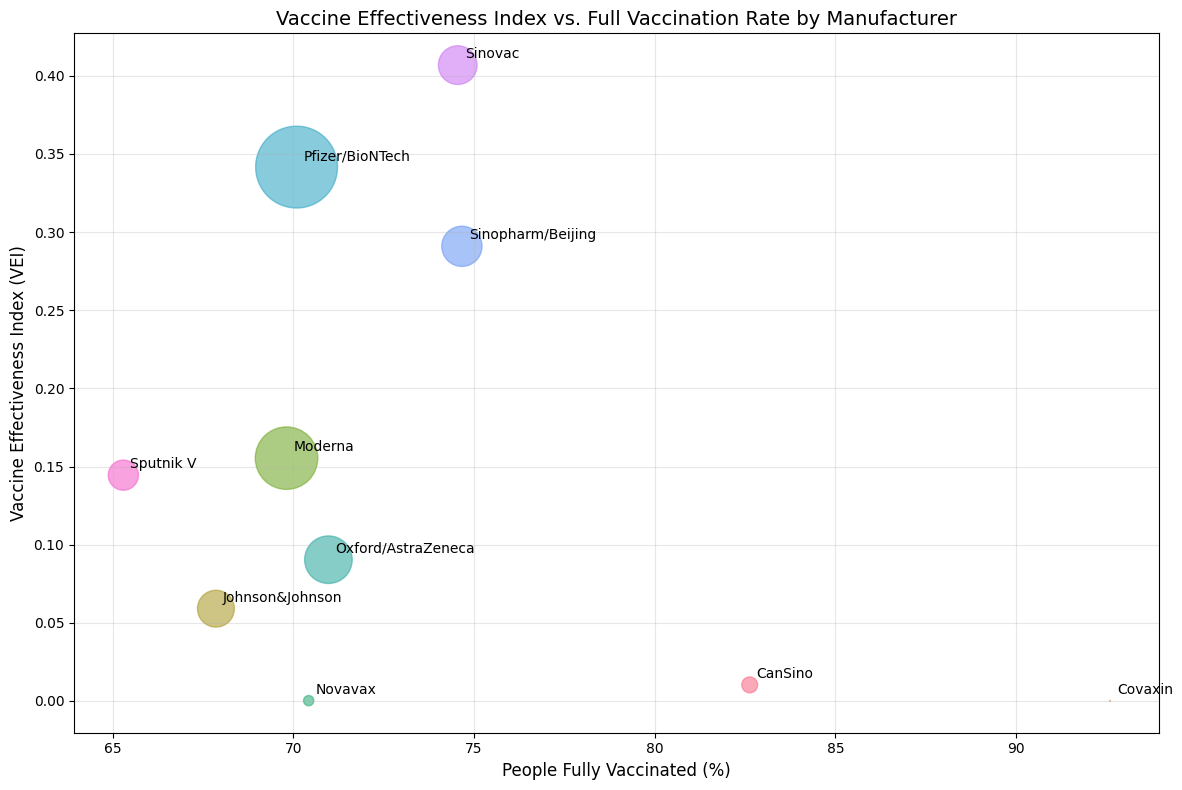

In [15]:
# Calculate VEI by manufacturer and join with vaccination data
manufacturer_performance = merged_data.groupby('manufacturer').agg({
    'vei': lambda x: np.average(x, weights=merged_data.loc[x.index, 'total_vaccinations']),
    'total_vaccinations': 'sum'
}).reset_index()

# Get latest vaccination data per country
latest_vaccination_data = vaccinations_by_country.sort_values('date').groupby('country').last()

# Calculate mean vaccination rate for countries using each manufacturer
manufacturer_vaccination_rates = latest_vax_data.merge(
    latest_vaccination_data[['people_fully_vaccinated_per_hundred']], 
    left_on='country', 
    right_index=True,
    how='inner'
).groupby('manufacturer').agg({
    'people_fully_vaccinated_per_hundred': 'mean'
}).reset_index()

# Merge vaccination rates with manufacturer performance
manufacturer_performance = manufacturer_performance.merge(
    manufacturer_vaccination_rates,
    on='manufacturer',
    how='inner'
)

# Create scatter plot
plt.figure(figsize=(12, 8))

# Create scatter plot with size based on total vaccinations
scatter = plt.scatter(manufacturer_performance['people_fully_vaccinated_per_hundred'], 
                     manufacturer_performance['vei'],
                     s=manufacturer_performance['total_vaccinations'].apply(lambda x: np.sqrt(x/1e6)*100), # Scale the size
                     alpha=0.6,
                     c=[manufacturer_colors.get(m, 'gray') for m in manufacturer_performance['manufacturer']])

# Add labels for each point
for idx, row in manufacturer_performance.iterrows():
    plt.annotate(row['manufacturer'], 
                (row['people_fully_vaccinated_per_hundred'], row['vei']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10)

# Customize the plot
plt.title('Vaccine Effectiveness Index vs. Full Vaccination Rate by Manufacturer', fontsize=14)
plt.xlabel('People Fully Vaccinated (%)', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.grid(True, alpha=0.3)

# # Add a trend line
# z = np.polyfit(manufacturer_performance['people_fully_vaccinated_per_hundred'], 
#                manufacturer_performance['vei'], 1)
# p = np.poly1d(z)
# plt.plot(manufacturer_performance['people_fully_vaccinated_per_hundred'], 
#          p(manufacturer_performance['people_fully_vaccinated_per_hundred']), 
#          "r--", alpha=0.8)

plt.tight_layout()
plt.show()

C:\Users\KOSEN\AppData\Local\Temp\ipykernel_15728\1217717130.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  legend_elements = [plt.scatter([], [], c=color, label=manufacturer)


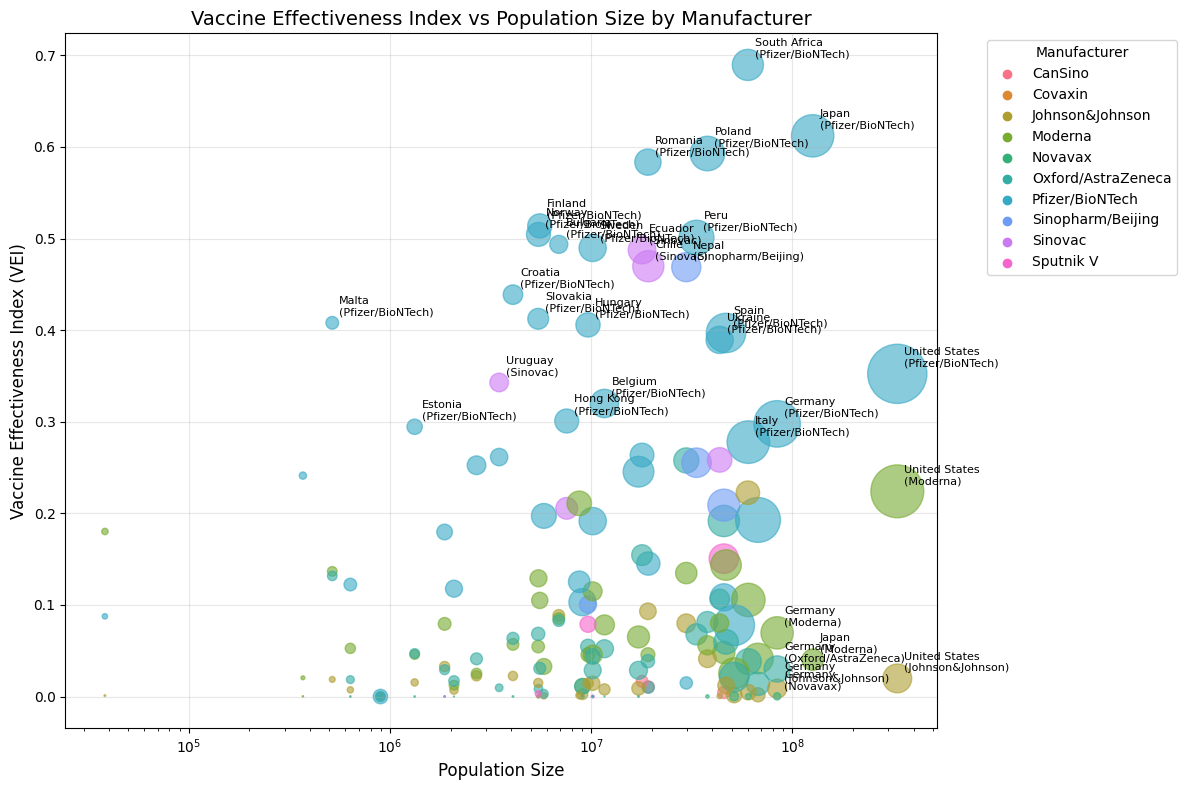

In [ ]:
# Create scatter plot comparing population size and VEI
plt.figure(figsize=(12, 8))

# Create scatter plot with size based on total vaccinations
scatter = plt.scatter(merged_data['estimated_population'],
                      merged_data['vei'],
                      s=merged_data['total_vaccinations'].apply(
                          lambda x: np.sqrt(x/1e6)*100),
                      c=[manufacturer_colors.get(m, 'gray')
                         for m in merged_data['manufacturer']],
                      alpha=0.6)

# Add labels for significant points (those with high VEI or large population)
threshold_vei = merged_data['vei'].mean() + merged_data['vei'].std()
threshold_pop = merged_data['estimated_population'].mean(
) + merged_data['estimated_population'].std()

for idx, row in merged_data.iterrows():
    if row['vei'] > threshold_vei or row['estimated_population'] > threshold_pop:
        plt.annotate(f"{row['country']}\n({row['manufacturer']})",
                     (row['estimated_population'], row['vei']),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8)

# Customize the plot
plt.title(
    'Vaccine Effectiveness Index vs Population Size by Manufacturer', fontsize=14)
plt.xlabel('Population Size', fontsize=12)
plt.ylabel('Vaccine Effectiveness Index (VEI)', fontsize=12)
plt.grid(True, alpha=0.3)

# Use log scale for population axis due to wide range
plt.xscale('log')

# Add legend
legend_elements = [plt.scatter([], [], c=color, label=manufacturer)
                   for manufacturer, color in manufacturer_colors.items()]
plt.legend(handles=legend_elements, title='Manufacturer',
           bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()